In [ ]:
import torch
from torch import nn

## Самостоятельная реализация свертки

In [ ]:
def corr2d(X, K):  
    h, w = K.shape
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = (X[i: i + h, j: j + w] * K).sum()
    return Y

In [3]:
X = torch.Tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
K = torch.Tensor([[0, 1], [2, 3]])
corr2d(X, K)

tensor([[19., 25.],
        [37., 43.]])

## Детекция граней

In [4]:
X = torch.ones((6, 8))
X[:, 2:6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [5]:
## вертикальные грани есть
K = torch.Tensor([[1, -1]])
Y = corr2d(X, K)
print(X)
print(Y)

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])
tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])


In [6]:
## вертикальных граней нет
Z = corr2d(X.T, K)
print(X.T)
print(Z)

tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


## Сверточный слой

In [ ]:
X = X.reshape(1, 1, 6, 8)
Y = Y.reshape(1, 1, 6, 7)

In [ ]:
conv2d = torch.nn.Conv2d(1, 1, (1,2))

In [ ]:
trainer = torch.optim.SGD(conv2d.parameters(), lr=0.001)

In [10]:
for i in range(500):
    trainer.zero_grad()
    Y_hat = conv2d(X)
    l = ((Y_hat - Y) ** 2).sum()
    l.backward()
    trainer.step()
    if (i + 1) % 2 == 0:
        print('batch %d, loss %.3f' % (i + 1, l.item()))

batch 2, loss 18.341
batch 4, loss 14.430
batch 6, loss 11.923
batch 8, loss 10.255
batch 10, loss 9.091
batch 12, loss 8.235
batch 14, loss 7.570
batch 16, loss 7.027
batch 18, loss 6.564
batch 20, loss 6.157
batch 22, loss 5.791
batch 24, loss 5.457
batch 26, loss 5.147
batch 28, loss 4.860
batch 30, loss 4.590
batch 32, loss 4.338
batch 34, loss 4.101
batch 36, loss 3.878
batch 38, loss 3.668
batch 40, loss 3.470
batch 42, loss 3.283
batch 44, loss 3.107
batch 46, loss 2.941
batch 48, loss 2.784
batch 50, loss 2.636
batch 52, loss 2.496
batch 54, loss 2.364
batch 56, loss 2.240
batch 58, loss 2.122
batch 60, loss 2.011
batch 62, loss 1.905
batch 64, loss 1.806
batch 66, loss 1.712
batch 68, loss 1.623
batch 70, loss 1.539
batch 72, loss 1.460
batch 74, loss 1.384
batch 76, loss 1.313
batch 78, loss 1.246
batch 80, loss 1.182
batch 82, loss 1.122
batch 84, loss 1.064
batch 86, loss 1.010
batch 88, loss 0.959
batch 90, loss 0.910
batch 92, loss 0.864
batch 94, loss 0.821
batch 96, los

In [11]:
print(conv2d.weight)
print(conv2d.bias)

Parameter containing:
tensor([[[[ 0.9982, -0.9982]]]], requires_grad=True)
Parameter containing:
tensor([-1.8279e-05], requires_grad=True)


## Padding и stride

In [12]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1)
X = torch.randn((1, 1, 8, 8))
conv2d(X).shape

torch.Size([1, 1, 8, 8])

In [13]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1, stride=2)
X = torch.randn((1, 1, 8, 8))
conv2d(X).shape

torch.Size([1, 1, 4, 4])

## Каналы

In [14]:
conv2d = nn.Conv2d(1, 1, kernel_size=3, padding=1)
X = torch.randn((1, 1, 8, 8))
conv2d(X).shape

torch.Size([1, 1, 8, 8])

In [15]:
conv2d.weight.shape

torch.Size([1, 1, 3, 3])

In [16]:
conv2d = nn.Conv2d(3, 32, kernel_size=3, padding=1)
X = torch.randn((1, 3, 8, 8))
conv2d(X).shape

torch.Size([1, 32, 8, 8])

In [17]:
conv2d.weight.shape

torch.Size([32, 3, 3, 3])

## Pooling

In [ ]:
def pool2d(X, pool_size, mode='max'):
    p_h, p_w = pool_size
    Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i, j] = X[i: i + p_h, j: j + p_w].max()
            elif mode == 'avg':
                Y[i, j] = X[i: i + p_h, j: j + p_w].mean()
    return Y

In [19]:
X = torch.Tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
print(X)
print(pool2d(X, (2, 2)))

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])
tensor([[4., 5.],
        [7., 8.]])


In [20]:
pool2d(X, (2, 2), 'avg')

tensor([[2., 3.],
        [5., 6.]])

In [21]:
X = torch.arange(16).reshape((1, 1, 4, 4)).type(torch.float)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [22]:
pool2d = nn.MaxPool2d(3)
pool2d(X)

tensor([[[[10.]]]])

In [23]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [24]:
pool2d = nn.MaxPool2d((2, 3), padding=(1, 1), stride=(2, 3))
pool2d(X)

tensor([[[[ 1.,  3.],
          [ 9., 11.],
          [13., 15.]]]])

In [25]:
X = torch.cat((X, X + 1), dim=1)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [26]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

## Lenet

In [ ]:
import torchvision as tv
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
BATCH_SIZE=256

In [29]:
train_dataset = tv.datasets.MNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.MNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

0it [00:00, ?it/s]

9920512it [00:05, 1848126.79it/s]                             


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


32768it [00:00, 444709.98it/s]
  1%|          | 16384/1648877 [00:00<00:11, 141885.06it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


1654784it [00:00, 7451785.09it/s]                           
8192it [00:00, 181028.43it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw
Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


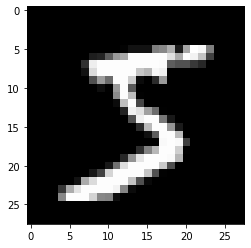

In [30]:
plt.imshow(train_dataset[0][0].numpy().reshape(28,28), cmap='gray')

In [31]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [ ]:
model = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(2, stride=2),
    nn.Conv2d(6, 12, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(2, stride=2),
    nn.Flatten(),
    nn.Linear(300, 50),
    nn.ReLU(),
    nn.Linear(50, 10)
)

In [33]:
X = train_dataset[0][0]
X = X.reshape(1, 1, 28, 28)
print(X.shape)
for l in model:
    X = l(X)
    print("Layer {}. X shape: {}".format(l, X.shape))

torch.Size([1, 1, 28, 28])
Layer Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)). X shape: torch.Size([1, 6, 28, 28])
Layer ReLU(). X shape: torch.Size([1, 6, 28, 28])
Layer MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False). X shape: torch.Size([1, 6, 14, 14])
Layer Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1)). X shape: torch.Size([1, 12, 10, 10])
Layer ReLU(). X shape: torch.Size([1, 12, 10, 10])
Layer MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False). X shape: torch.Size([1, 12, 5, 5])
Layer Flatten(). X shape: torch.Size([1, 300])
Layer Linear(in_features=300, out_features=50, bias=True). X shape: torch.Size([1, 50])
Layer ReLU(). X shape: torch.Size([1, 50])
Layer Linear(in_features=50, out_features=10, bias=True). X shape: torch.Size([1, 10])


In [34]:
X = train_dataset[0][0]
X = X.reshape(1, 1, 28, 28)
y = model(X)
print(y.shape)

torch.Size([1, 10])


In [ ]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = torch.Tensor([0]), 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(axis=1) == y).sum()
        n += y.shape[0]
    return acc_sum.item() / n

In [ ]:
def train(net, train_iter, test_iter, trainer, num_epochs):
    loss = nn.CrossEntropyLoss(reduction='sum')
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()
        for X, y in train_iter:
            trainer.zero_grad()
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            trainer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f, '
              'time %.1f sec'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc,
                 time.time() - start))

In [37]:
lr, num_epochs = 0.001, 5
trainer = torch.optim.SGD(model.parameters(), lr=lr)
train(model, train_iter, test_iter, trainer, num_epochs)

epoch 1, loss 0.7282, train acc 0.751, test acc 0.954, time 15.9 sec
epoch 2, loss 0.1156, train acc 0.964, test acc 0.972, time 16.7 sec
epoch 3, loss 0.0800, train acc 0.975, test acc 0.980, time 16.1 sec
epoch 4, loss 0.0633, train acc 0.980, test acc 0.981, time 17.7 sec
epoch 5, loss 0.0528, train acc 0.984, test acc 0.983, time 15.6 sec


## Обучение на GPU

In [ ]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [39]:
dev

device(type='cuda')

In [ ]:
model = model.to(dev)

In [ ]:
def train(net, train_iter, test_iter, trainer, num_epochs, dev):
    loss = nn.CrossEntropyLoss(reduction='sum')
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()
        for X, y in train_iter:
            trainer.zero_grad()
            X, y = X.to(dev), y.to(dev)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            trainer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter, net, dev)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f, '
              'time %.1f sec'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc,
                 time.time() - start))

In [ ]:
def evaluate_accuracy(data_iter, net, dev):
    acc_sum, n = torch.Tensor([0]).to(dev), 0
    for X, y in data_iter:
        X, y = X.to(dev), y.to(dev)
        acc_sum += (net(X).argmax(axis=1) == y).sum()
        n += y.shape[0]
    return acc_sum.item() / n

In [43]:
lr, num_epochs = 0.001, 5
trainer = torch.optim.SGD(model.parameters(), lr=lr)
train(model, train_iter, test_iter, trainer, num_epochs, dev)

epoch 1, loss 0.0456, train acc 0.986, test acc 0.984, time 8.4 sec
epoch 2, loss 0.0400, train acc 0.987, test acc 0.984, time 8.5 sec
epoch 3, loss 0.0356, train acc 0.989, test acc 0.985, time 8.5 sec
epoch 4, loss 0.0317, train acc 0.990, test acc 0.985, time 8.5 sec
epoch 5, loss 0.0287, train acc 0.991, test acc 0.985, time 8.5 sec


## Аугментация данных

In [ ]:
def show_images(imgs, num_rows, num_cols, scale=2):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j], cmap='gray')
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    plt.show()

In [ ]:
def apply(img, aug, num_rows=2, num_cols=4, scale=2):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

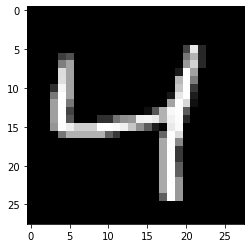

In [46]:
dataset = tv.datasets.MNIST('.', train=True, download=True)
img = dataset[2][0]
plt.imshow(img, cmap='gray')

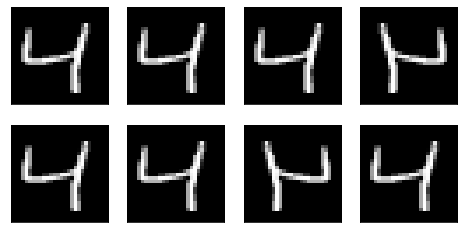

In [47]:
apply(img, tv.transforms.RandomHorizontalFlip())

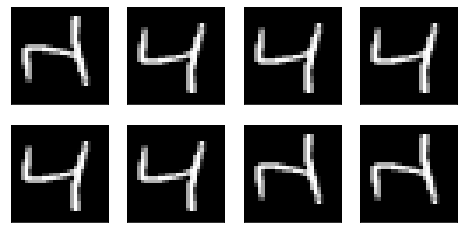

In [48]:
apply(img, tv.transforms.RandomVerticalFlip())

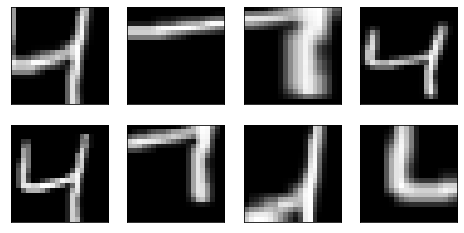

In [49]:
## A crop of random size (default: of 0.08 to 1.0) of the original size and a random aspect ratio
## (default: of 3/4 to 4/3) of the original aspect ratio is made.
## This crop is finally resized to given size. 
apply(img, tv.transforms.RandomResizedCrop((20,20), scale=(0.1, 1.), ratio=(0.5, 2)))

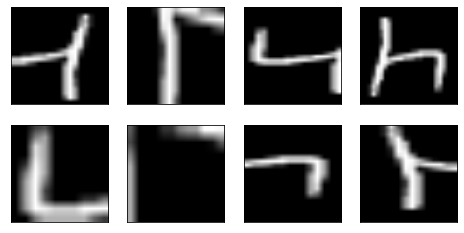

In [50]:
augs = tv.transforms.Compose([
    tv.transforms.RandomHorizontalFlip(),
    tv.transforms.RandomVerticalFlip(),
    tv.transforms.RandomResizedCrop(
        (200, 200), scale=(0.1, 1), ratio=(0.5, 2))])
apply(img, augs)

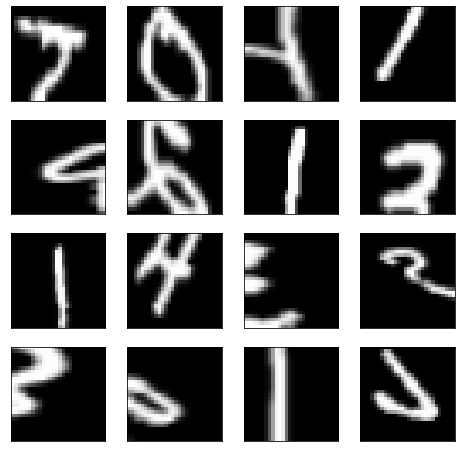

In [51]:
augs = tv.transforms.Compose([
    tv.transforms.RandomHorizontalFlip(),
    tv.transforms.RandomVerticalFlip(),
    tv.transforms.RandomResizedCrop(
        (28, 28), scale=(0.1, 1), ratio=(0.5, 2)),
    tv.transforms.ToTensor()])
dataset = tv.datasets.MNIST('.', train=True, transform=augs, download=True)
loader = torch.utils.data.DataLoader(dataset, batch_size=16)

for X, _ in loader:
    X = X.reshape(16, 28, 28)
    show_images(X, 4, 4)
    break

## Hometask
http://www.nlpr.ia.ac.cn/pal/trafficdata/tsrd-train.zip
http://www.nlpr.ia.ac.cn/pal/trafficdata/TSRD-Test.zip
http://www.nlpr.ia.ac.cn/pal/trafficdata/TSRD-Train%20Annotation.zip
http://www.nlpr.ia.ac.cn/pal/trafficdata/TSRD-Test%20Annotation.zip

In [52]:
import urllib
urllib.request.urlretrieve ("http://www.nlpr.ia.ac.cn/pal/trafficdata/tsrd-train.zip", "tsrd-train.zip")
urllib.request.urlretrieve ("http://www.nlpr.ia.ac.cn/pal/trafficdata/TSRD-Test.zip", "TSRD-Test.zip")
urllib.request.urlretrieve ("http://www.nlpr.ia.ac.cn/pal/trafficdata/TSRD-Train%20Annotation.zip", "TSRD-Train%20Annotation.zip")
urllib.request.urlretrieve ("http://www.nlpr.ia.ac.cn/pal/trafficdata/TSRD-Test%20Annotation.zip", "TSRD-Test%20Annotation.zip")

('TSRD-Test%20Annotation.zip', <http.client.HTTPMessage at 0x7fa2ea495550>)

In [ ]:
#tv.datasets.imageFolder
#tv.transforms.Resize

In [ ]:
import torch
from torch import nn
import torchvision as tv
import time
import numpy as np

In [55]:
!mkdir images
!unzip tsrd-train.zip -d images/train
!unzip TSRD-Test.zip -d images/test
!unzip TSRD-Train%20Annotation.zip -d images/train/Annotation
!unzip TSRD-Test%20Annotation.zip -d images/test/Annotation

Archive:  tsrd-train.zip
  inflating: images/train/056_0051.png  
  inflating: images/train/056_0052.png  
 extracting: images/train/056_0053.png  
 extracting: images/train/056_0054.png  
  inflating: images/train/057_0001.png  
  inflating: images/train/057_1_0001.png  
  inflating: images/train/057_1_0002.png  
  inflating: images/train/057_1_0003_1_j.png  
  inflating: images/train/057_0002.png  
  inflating: images/train/057_0003_j.png  
 extracting: images/train/000_0001.png  
 extracting: images/train/000_1_0001.png  
  inflating: images/train/000_1_0002.png  
 extracting: images/train/000_1_0003.png  
 extracting: images/train/000_1_0004.png  
 extracting: images/train/000_1_0005.png  
 extracting: images/train/000_1_0006.png  
 extracting: images/train/000_1_0007.png  
 extracting: images/train/000_1_0008.png  
 extracting: images/train/000_1_0008_1_j.png  
 extracting: images/train/000_1_0009.png  
 extracting: images/train/000_1_0010.png  
  inflating: images/train/000_1_001

In [ ]:
#!cat images/train/Annotation/TsignRecgTrain4170Annotation.txt  
#images/test/Annotation/TsignRecgTest1994Annotation.txt
#000_0001.png;134;128;19;7;120;117;0;
import pandas as pd
import shutil
import os

df_train = pd.read_csv('images/train/Annotation/TsignRecgTrain4170Annotation.txt',sep=';',header=None,names=['name','c1','c2','c3','c4','c5','c6','class','na']).drop(['na'],axis=1)
for r in df_train[['name','class']].values:
  directory = os.path.dirname("images/train/"+str(r[1])+'/')
  if not os.path.exists(directory):
      os.makedirs(directory)
  shutil.move("images/train/"+r[0], directory+'/'+r[0])
  #print("images/train/"+r[0], directory+r[0])

In [ ]:
df_test = pd.read_csv('images/test/Annotation/TsignRecgTest1994Annotation.txt',sep=';',header=None,names=['name','c1','c2','c3','c4','c5','c6','class','na']).drop(['na'],axis=1)
for r in df_test[['name','class']].values:
  directory = os.path.dirname("images/test/"+str(r[1])+'/')
  if not os.path.exists(directory):
      os.makedirs(directory)
  shutil.move("images/test/"+r[0], directory+'/'+r[0])

In [ ]:
transforms = tv.transforms.Compose([
    #tv.transforms.Grayscale(3),
    #tv.transforms.RandomHorizontalFlip(),
    #tv.transforms.RandomVerticalFlip(),
    #tv.transforms.RandomResizedCrop(
    #    (224, 224), scale=(0.1, 1), ratio=(0.5, 2)),
    tv.transforms.Resize((224,224)),
    tv.transforms.ToTensor()    
])

In [ ]:
BATCH_SIZE=16
train_dataset = tv.datasets.ImageFolder("images/train", transform=transforms)
test_dataset = tv.datasets.ImageFolder("images/test", transform=transforms)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [ ]:
labels = [td[1] for td in train_dataset]

In [ ]:
lbs = np.array(labels)

In [62]:
np.unique(lbs)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
for X, y in train_iter:
  break

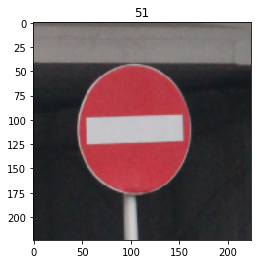

In [65]:
img_code = 10
plt.imshow(X[img_code].permute(1,2,0))
plt.title(str(y[img_code].item()))
plt.show()

In [ ]:
model = nn.Sequential(
    nn.Conv2d(3, 64, kernel_size=5, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(3, stride=2),
    nn.Conv2d(64, 256, kernel_size=5, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(3, stride=2),
    nn.Conv2d(256, 512, kernel_size=5, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(3, stride=2),
    nn.Conv2d(512, 1024, kernel_size=5, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(3, stride=2),
    nn.Flatten(),
    nn.Linear(173056, 1024),
    nn.ReLU(),
    nn.Linear(1024, len(np.unique(lbs)))
)

In [67]:
X = train_dataset[0][0]
X = X.reshape(1, 3, 224, 224)
print(X.shape)
for l in model:
    X = l(X)
    print("Layer {}. X shape: {}".format(l, X.shape))

torch.Size([1, 3, 224, 224])
Layer Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)). X shape: torch.Size([1, 64, 224, 224])
Layer ReLU(). X shape: torch.Size([1, 64, 224, 224])
Layer MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False). X shape: torch.Size([1, 64, 111, 111])
Layer Conv2d(64, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)). X shape: torch.Size([1, 256, 111, 111])
Layer ReLU(). X shape: torch.Size([1, 256, 111, 111])
Layer MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False). X shape: torch.Size([1, 256, 55, 55])
Layer Conv2d(256, 512, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)). X shape: torch.Size([1, 512, 55, 55])
Layer ReLU(). X shape: torch.Size([1, 512, 55, 55])
Layer MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False). X shape: torch.Size([1, 512, 27, 27])
Layer Conv2d(512, 1024, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2)). X shape: torch.Size([1, 1024, 27, 27]

In [ ]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [69]:
dev

device(type='cuda')

In [ ]:
model = model.to(dev)

In [ ]:
def train(net, train_iter, test_iter, trainer, num_epochs, dev):
    loss = nn.CrossEntropyLoss(reduction='sum')
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n, start = 0.0, 0.0, 0, time.time()
        for X, y in train_iter:
            trainer.zero_grad()
            X, y = X.to(dev), y.to(dev)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            trainer.step()
            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(axis=1) == y).sum().item()
            n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter, net, dev)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f, '
              'time %.1f sec'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc,
                 time.time() - start))

In [ ]:
def evaluate_accuracy(data_iter, net, dev):
    acc_sum, n = torch.Tensor([0]).to(dev), 0
    for X, y in data_iter:
        X, y = X.to(dev), y.to(dev)
        acc_sum += (net(X).argmax(axis=1) == y).sum()
        n += y.shape[0]
    return acc_sum.item() / n

In [73]:
lr, num_epochs = 0.01, 5
trainer = torch.optim.SGD(model.parameters(), lr=lr)
train(model, train_iter, test_iter, trainer, num_epochs, dev)

epoch 1, loss 3.7032, train acc 0.097, test acc 0.042, time 53.2 sec
epoch 2, loss 3.5853, train acc 0.102, test acc 0.042, time 53.8 sec
epoch 3, loss 3.5684, train acc 0.103, test acc 0.002, time 53.2 sec
epoch 4, loss 3.5619, train acc 0.102, test acc 0.042, time 53.5 sec
epoch 5, loss 3.5560, train acc 0.106, test acc 0.042, time 53.6 sec


In [74]:
lr, num_epochs = 0.01, 5
trainer = torch.optim.Adam(model.parameters(), lr=lr)
train(model, train_iter, test_iter, trainer, num_epochs, dev)

epoch 1, loss 13.3248, train acc 0.105, test acc 0.042, time 60.6 sec
epoch 2, loss 3.5555, train acc 0.106, test acc 0.042, time 59.8 sec
epoch 3, loss 3.5551, train acc 0.107, test acc 0.042, time 60.3 sec
epoch 4, loss 3.5510, train acc 0.107, test acc 0.042, time 60.2 sec
epoch 5, loss 3.5490, train acc 0.107, test acc 0.042, time 60.4 sec


In [76]:
model = tv.models.resnet18(pretrained=True)
model.fc = nn.Linear(512, len(np.unique(lbs)))
model = model.to(dev)
print("Params to learn:")
params_to_update = []
for name, param in model.named_parameters():
    if not (name.startswith('layer4')):
      param.requires_grad = False
    else:
      params_to_update.append(param)
      print("\t",name)

Params to learn:
	 layer4.0.conv1.weight
	 layer4.0.bn1.weight
	 layer4.0.bn1.bias
	 layer4.0.conv2.weight
	 layer4.0.bn2.weight
	 layer4.0.bn2.bias
	 layer4.0.downsample.0.weight
	 layer4.0.downsample.1.weight
	 layer4.0.downsample.1.bias
	 layer4.1.conv1.weight
	 layer4.1.bn1.weight
	 layer4.1.bn1.bias
	 layer4.1.conv2.weight
	 layer4.1.bn2.weight
	 layer4.1.bn2.bias


In [77]:
lr, num_epochs = 0.01, 5
trainer = torch.optim.Adam(params_to_update, lr=lr)
train(model, train_iter, test_iter, trainer, num_epochs, dev)

epoch 1, loss 0.8486, train acc 0.786, test acc 0.051, time 20.6 sec
epoch 2, loss 0.1402, train acc 0.967, test acc 0.052, time 20.2 sec
epoch 3, loss 0.0291, train acc 0.994, test acc 0.052, time 20.4 sec
epoch 4, loss 0.0404, train acc 0.992, test acc 0.060, time 20.4 sec
epoch 5, loss 0.0331, train acc 0.992, test acc 0.034, time 20.3 sec


In [78]:
lr, num_epochs = 0.001, 5
trainer = torch.optim.SGD(model.parameters(), lr=lr)
train(model, train_iter, test_iter, trainer, num_epochs, dev)

epoch 1, loss 0.0331, train acc 0.994, test acc 0.033, time 20.3 sec
epoch 2, loss 0.0321, train acc 0.993, test acc 0.034, time 20.3 sec
epoch 3, loss 0.0250, train acc 0.996, test acc 0.034, time 20.1 sec
epoch 4, loss 0.0260, train acc 0.994, test acc 0.035, time 21.3 sec
epoch 5, loss 0.0216, train acc 0.997, test acc 0.035, time 19.9 sec
